In [2]:
!curl https://s3.amazonaws.com/tripdata/201401-citibike-tripdata.zip > 201401-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9470k  100 9470k    0     0  18.2M      0 --:--:-- --:--:-- --:--:-- 18.2M


In [3]:
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/jl9760/PUIdata


In [7]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/jl9760/PUIdata


In [8]:
!mv 201401-citibike-tripdata.zip $PUIDATA

In [9]:
!ls $PUIDATA

2014-01 - Citi Bike trip data.csv  gt.csv      saes.csv
201401-citibike-tripdata.zip	   jl9760.csv  service_request.csv
201601-citibike-tripdata.csv	   pp.csv


In [10]:
!curl https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip > 201501-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  11.0M      0 --:--:-- --:--:-- --:--:-- 11.0M


In [11]:
!mv 201501-citibike-tripdata.zip $PUIDATA

In [12]:
!ls $PUIDATA

201401-citibike-tripdata.zip  gt.csv	  pp.csv    service_request.csv
201501-citibike-tripdata.zip  jl9760.csv  saes.csv


In [13]:
!curl https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip > 201601-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  26.1M      0 --:--:-- --:--:-- --:--:-- 26.1M


In [14]:
!mv 201601-citibike-tripdata.zip $PUIDATA

In [15]:
!ls $PUIDATA

201401-citibike-tripdata.zip  gt.csv	  saes.csv
201501-citibike-tripdata.zip  jl9760.csv  service_request.csv
201601-citibike-tripdata.zip  pp.csv


In [16]:
os.system("unzip " + os.getenv("PUIDATA") + "/"  + "201401-citibike-tripdata.zip")

0

In [17]:
!ls $PUIDATA

201401-citibike-tripdata.zip  gt.csv	  saes.csv
201501-citibike-tripdata.zip  jl9760.csv  service_request.csv
201601-citibike-tripdata.zip  pp.csv


In [18]:
os.system("unzip " + os.getenv("PUIDATA") + "/"  + "201401-citibike-tripdata.zip")

0

In [19]:
!mv 201401-citibike-tripdata.csv $PUIDATA

mv: cannot stat '201401-citibike-tripdata.csv': No such file or directory


In [20]:
os.system("unzip " + os.getenv("PUIDATA") + "/"  + "201501-citibike-tripdata.zip")

0

In [21]:
os.system("unzip " + os.getenv("PUIDATA") + "/"  + "201601-citibike-tripdata.zip")

0

In [25]:
!ls $PUIDATA

2014-01 - Citi Bike trip data.csv  201701-citibike-tripdata.zip
201401-citibike-tripdata.zip	   gt.csv
201501-citibike-tripdata.csv	   jl9760.csv
201501-citibike-tripdata.zip	   pp.csv
201601-citibike-tripdata.csv	   saes.csv
201601-citibike-tripdata.zip	   service_request.csv


In [4]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# IDEA:

## Users that are younger than 30 years old are more likely have a longer trip duration.

# NULL HYPOTHESIS:

## The trip duration of users that are younger than 30 years old is about the same or shorter comparing with older users.

# ALTERNATIVE HYPOTHESIS:

## Users that are younger than 30 years old are more likely have a longer trip duration.

In [12]:
df_1 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201501-citibike-tripdata.csv')

In [13]:
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [7]:
df_1.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [8]:
df_age_tripduration = df_1[['birth year', 'tripduration']]

In [9]:
df_age_tripduration.head()

,birth year,tripduration
0,1960.0,1346
1,1963.0,363
2,1974.0,346
3,1969.0,182
4,1977.0,969


In [35]:
import matplotlib.pyplot as plt

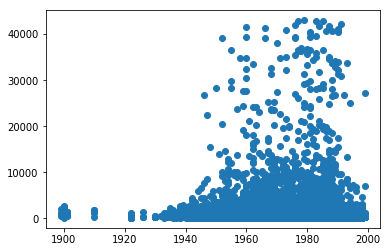

In [52]:
pl.scatter(df_age_tripduration['birth year'], df_age_tripduration['tripduration'])

In [16]:
x = df_age_tripduration['birth year']
y = df_age_tripduration['tripduration']

Text(0.5,1,'Scatterplot of Simulated Data')

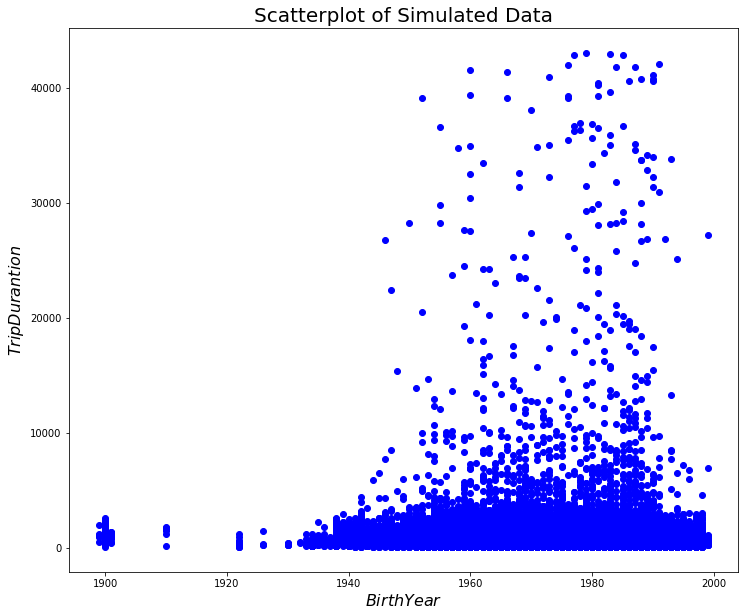

In [17]:
plt.figure(figsize=(12, 10))
plt.plot(x, y, 'bo')
plt.xlabel(r'$Birth Year$', fontsize = 16)
plt.ylabel(r'$Trip Durantion$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

## The plot clearly shows that as users get older, the trip duration decrease. 

In [18]:
df_2 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201601-citibike-tripdata.csv')

In [19]:
df_2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [20]:
df_2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [21]:
df_age_tripduration_2 = df_2[['birth year', 'tripduration']]

In [22]:
df_age_tripduration_2.head()

,birth year,tripduration
0,1958.0,923
1,1969.0,379
2,1982.0,589
3,1961.0,889
4,1952.0,1480


In [23]:
x_1 = df_age_tripduration_2['birth year']
y_1 = df_age_tripduration_2['tripduration']

Text(0.5,1,'Scatterplot of Simulated Data')

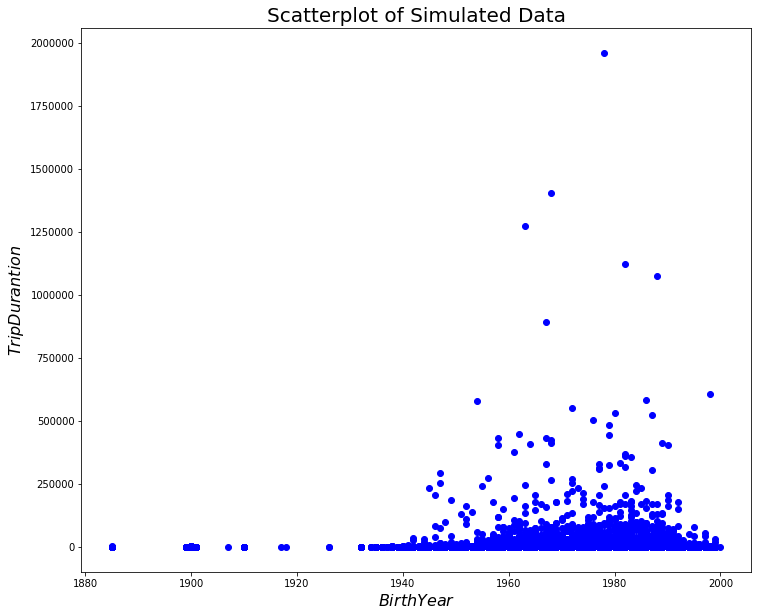

In [24]:
plt.figure(figsize=(12, 10))
plt.plot(x_1, y_1, 'bo')
plt.xlabel(r'$Birth Year$', fontsize = 16)
plt.ylabel(r'$Trip Durantion$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

## The plot clearly shows that as users get older, the trip duration decrease. 